In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, log_loss

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [48]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [49]:
X = df.drop('left', axis=1)
y = df['left']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y,random_state=24)

In [51]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
print(lr.intercept_, lr.coef_)

y_pred_prob = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)
y_pred

[-0.02414522] [[-4.12858555  0.83464255 -0.30520834  0.00433721  0.22078297 -1.6426259
  -1.77134107  0.03259727  0.01384491]]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'sensitivity')

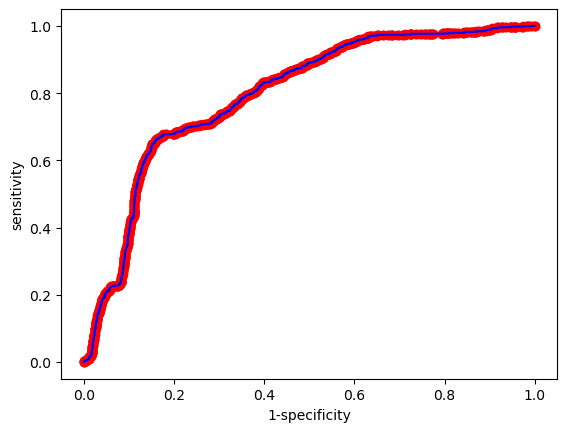

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(fpr, tpr, c='red')
plt.plot(fpr, tpr, c='blue')
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

In [53]:
print(fpr, tpr)
print(thresholds)

[0.00000000e+00 2.91630213e-04 5.83260426e-04 ... 9.99125109e-01
 9.99708370e-01 1.00000000e+00] [0. 0. 0. ... 1. 1. 1.]
[1.86955855e+00 8.69558547e-01 8.37934760e-01 ... 2.29576739e-03
 1.79694941e-03 1.17436896e-03]


In [54]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.7966696919894359

In [59]:
# KFold
lr = LogisticRegression(penalty=None)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
results = cross_val_score(lr, X, y, cv=kfold, scoring='neg_log_loss')
results.mean()

-0.3055920660229538

In [60]:
log_loss(y_test, y_pred_prob[:,1])

0.45163753347034924

In [57]:
# 0.7966696919894359
# -0.4463049683637732
# 0.45163753347034924



In [62]:
params = {'penalty':['l2', None], 'C':np.linspace(0.001, 10, 10), 'solver':['lbfgs, newton-cg', 'newton-cholesky', 'sag']}

lr = LogisticRegression(penalty=None)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(lr, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LogisticRegression(penalty=None),
             param_grid={'C': array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01]),
                         'penalty': ['l2', None],
                         'solver': ['lbfgs, newton-cg', 'newton-cholesky',
                                    'sag']},
             scoring='neg_log_loss')

In [63]:
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 1.1119999999999999, 'penalty': 'l2', 'solver': 'sag'}
-0.2768387651846952


In [66]:
new_df = pd.DataFrame(gcv.cv_results_)
new_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001064,2.295440e-04,0.000000,0.000000,0.001,l2,"lbfgs, newton-cg","{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
1,0.029931,4.986792e-02,0.001225,0.000744,0.001,l2,newton-cholesky,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",-0.508482,-0.513530,-0.510328,-0.488362,-0.517560,-0.507652,0.010126,40
2,0.016555,9.444204e-03,0.000697,0.000868,0.001,l2,sag,"{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}",-0.508482,-0.513529,-0.510330,-0.488361,-0.517559,-0.507652,0.010126,39
3,0.000000,0.000000e+00,0.000000,0.000000,0.001,None,"lbfgs, newton-cg","{'C': 0.001, 'penalty': None, 'solver': 'lbfgs...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
4,0.012499,6.249507e-03,0.000000,0.000000,0.001,None,newton-cholesky,"{'C': 0.001, 'penalty': None, 'solver': 'newto...",-0.323587,-0.294012,-0.388541,-0.204506,-0.307607,-0.303651,0.059232,29
5,0.096866,1.822101e-02,0.000000,0.000000,0.001,None,sag,"{'C': 0.001, 'penalty': None, 'solver': 'sag'}",-0.309768,-0.289646,-0.290993,-0.200800,-0.302844,-0.278810,0.039717,18
6,0.000000,0.000000e+00,0.000000,0.000000,1.112,l2,"lbfgs, newton-cg","{'C': 1.1119999999999999, 'penalty': 'l2', 'so...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
7,0.008139,7.435178e-03,0.000400,0.000799,1.112,l2,newton-cholesky,"{'C': 1.1119999999999999, 'penalty': 'l2', 'so...",-0.312814,-0.290310,-0.321112,-0.202970,-0.303158,-0.286073,0.042799,20
8,0.083961,8.019437e-03,0.000000,0.000000,1.112,l2,sag,"{'C': 1.1119999999999999, 'penalty': 'l2', 'so...",-0.305954,-0.287998,-0.287621,-0.201872,-0.300750,-0.276839,0.038158,1
9,0.000000,0.000000e+00,0.000000,0.000000,1.112,None,"lbfgs, newton-cg","{'C': 1.1119999999999999, 'penalty': None, 'so...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
